# HW 04 
# Gary Fowler


## Exercise 5.1 

### Difference function

#### This document is uncomplete and has some errors in the later problems.


Write a program to read velocities.txt (a file with two columns, the first is time and the second is velocity at that time) and do the following:
a) Read in the data and using the trapezoidal rule calculate the approximate distance traveled by the particle in the x direction as a function of time.
b) Extend the program to make a graph that shows on the same plot, both the original veloctiy curve and the distance traveled as a function of time.


1328.918592


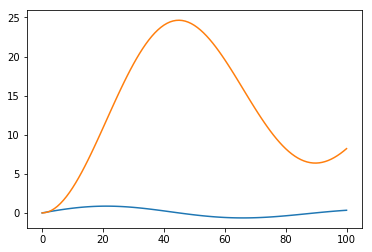

In [27]:
## @author: Gary Fowler

"""
@N: the loop controller, based on the size of the file
@data: the data from the file, should be a two dimensional array
@time: the time column from the file
@velocity: the velocity column from th file
@x: the distance traveled, is a one dimensional array

in this program we will calculate the distance traveled of a particle given its velocity and time traveled
we will also plot the velocity curve and the distance traveled

"""

import numpy as np
import matplotlib.pyplot as plt

#part a
data = np.loadtxt("velocities.txt",float)

time = data[:,0]
velocity = data[:,1]

#use a difference equation
N = len(time)

x = np.zeros(len(time))
x[0] = 0.0
for i in range(N - 1):
    x[i+1] = x[i] + (time[i+1] - time[i])*(velocity[i+1] + velocity[i]) / 2


print(sum(x))

plt.plot(time,velocity)
plt.plot(time,x)
plt.show()

## Exercise 5.2 

### Simpson's Rule Integration


Write a program to:
a) Calculate the integral from 0-2 of x^4 - 2x + 1 using Simpson's Rule and 10 slices.
b) Run the program and compare the result to the known value, compute the error.
c) Modify the program to use a hundred slices, then a thousand. Note the improvement.

In [41]:
## @author: Gary Fowler

"""
@N: the number of slices
@a, b: the range of integration
@h: the width of the slices
@true_result: the known result of the integral
@s: the running sum of the integration

@f(x): the function to be integrated, accepts the mathematical function input and returns the mathematical function output

in this program we will integrate using Simpson's Rule

"""
import numpy as np

def f(x):
    return x**4 - 2*x + 1

N = 1000
a = 0
b = 2.0
h = (b-a)/N
true_result = 4.4
 
s = (f(a) + f(b))

for k in range(1,N,2):
    s += 4.*f(a+k*h)
    
for k in range(2,N,2):
    s += 2.*f(a+k*h)
    
print("\nSimpson's Rule Integral estimate: ",h*s/3.)
print("Percent error: ",np.abs((h*s)/3.-true_result)/true_result * 100)


Simpson's Rule Integral estimate:  4.400000000004266
Percent error:  9.69527488595e-11


At N = 10 the estimate is 4.4004266...
The error is .009696...%
At N = 100 the estimate is 4.4000000426...
The error is 9.69...e-07 %
At N = 1000 the estimate is 4.400000000004266
The error is 9.695e-11 %

The results are significantly better than the Trapezoidal rule, which at 10 slices had an answer of 4.5065, even with only ten slices Simpson's Rule was within less than a percent of the correct value.

## Exercise 5.3 

### More Integration

Consider the integral, from 0 - x of exp(-t^2)dt
Write a program to:
a) Calculate E(x) for values of x from 0 to 3 in steps of .1
b) When convinced the program is working, extend it to graph E(x) as a function of x.


Simpson's Rule Integral estimate:  0.88620734816


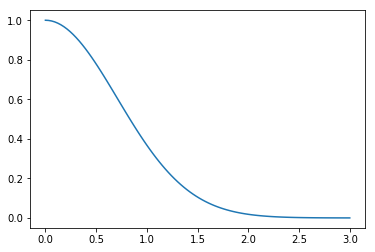

In [2]:
## @author: Gary Fowler

"""
@N: the number of slices
@a, b: the range of integration
@h: the width of the slices
@s: the running sum of the integration

@f(x): the function to be integrated, accepts the mathematical function input and returns the mathematical function output

in this program we will integrate using Simpson's Rule and then plot the result

"""
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.exp(-x**2)

N = 100
a = 0.
b = 3.
h = (b-a)/N
 
s = (f(a) + f(b))

for k in range(1,N,2):
    s += 4.*f(a+k*h)
    
for k in range(2,N,2):
    s += 2.*f(a+k*h)

print("\nSimpson's Rule Integral estimate: ",h*s/3.)   
    
x = np.linspace(a,b,N)

plt.plot(x,f(x))
plt.show()

## Exercise 5.6 

### More Integration continued

Consider the integral from Exercise 5.2.
Write a program to calculate the integral using trapezoidal rule with 20 slices, and then calculate an estimate of the error on the result. We will need to calculate the integral twice at N1 = 10 slices and again at N2 = 20 slices. How does the error differ from using the true value error calculation? Why do they not agree perfectly?

In [7]:
## @author: Gary Fowler

"""
@N1, N2: the number of slices
@a, b: the range of integration
@h1, h2: the width of the slices
@true_result: the true integration result
@s1, s2: the running sum of the integration

@f(x): the function to be integrated, accepts the mathematical function input and returns the mathematical function output

in this program we will integrate using Trapezoidal rule, calculate the error and then compare that with a true error calculation

"""
import numpy as np

def f(x):
    return x**4 - 2*x + 1

N1 = 10
N2 = 20
a = 0
b = 2.
h1 = (b-a)/N1
h2 = (b-a)/N2
true_result = 4.4

s1 = 0.5*(f(a) + f(b))
for k in range(1,N1):
    s1 += f(a+k*h1)

s2 = 0.5*(f(a) + f(b))
for k in range(1,N2):
    s2 += f(a+k*h2)
    
print("Trapezoidal Rule Integral estimate of",N1,"slices:",h1*s1)
print("Trapezoidal Rule Integral estimate of",N2,"slices:",h2*s2)
print("The calculated error is:",(h1*s1 - h2*s2)/3. * 100,"%")
print("The true error of",N1,"slices is:",np.abs((h1*s1)-true_result)/true_result * 100,"%")
print("The true error of",N2,"slices is:",np.abs((h2*s2)-true_result)/true_result * 100,"%")

Trapezoidal Rule Integral estimate of 10 slices: 4.50656
Trapezoidal Rule Integral estimate of 20 slices: 4.426660000000001
The calculated error is: 2.6633333333333136 %
The true error of 10 slices is: 2.42181818182 %
The true error of 20 slices is: 0.605909090909 %


The calculated error is larger than the true error values but it is not substantially different. The two differ because we are evaluating the error using the integral answers instead of the actual true answer. Our integral answers are still unaccurate and therefore using them to generate an error will not be completely accurate either.

## Exercise 5.7a 

### More Integration continued

Consider the integral from 0 - 1 of sin(sqrt(100x))^2
Write a program that uses the adaptive trapezoidal method given in the book to calculate the value of this integral to an approximate accurayce of epsilon = 10e-6. Start with a single integration slice and work up from there to 2,4,8,16,...
The program should print the number of slices, the integral estimate, and its estimated error of integration, for each value of N until the integral is reached.

In [32]:
## @author: Gary Fowler

"""
@N: the number of slices
@a, b: the range of integration
@h: the width of the slices
@s: the running sum of the integration
@I1: the first integration, this will be the previous integration and the first one at slice 1
@I2: the second integration, this is the one that is always adapting

@f(x): the function to be integrated, accepts the mathematical function input and returns the mathematical function output

in this program we will integrate using Trapezoidal rule but we will adapt the integration 
and increase the slices until we are within an error threshold, we will be displaying the slice number until
we reach that threshold

"""
import numpy as np

def f(x):
    return (np.sin(np.sqrt(100*x)))**2
    
tolerance = np.exp(-6)
a = 0.
b = 1.
N = 1
h = (b-a) / N

error = 1.0
while abs(error) > tolerance:
    I1 = .5 * (f(a) + f(b)) * h
    I2 = I1 / 2
    print("Trapezoidal Rule Integral estimate of",N,"slices:",I2)
    h /= 2
    N *= 2
    for i in range(1,N,2):
        I2 += I1 + f(a+i*h)
    error = abs(I2-I1)/3
    print(error)

print("The calculated error is:",error,"%")   

Trapezoidal Rule Integral estimate of 1 slices: 0.0739897422733
0.192158024447
Trapezoidal Rule Integral estimate of 2 slices: 0.0369948711367
0.50321740023
Trapezoidal Rule Integral estimate of 4 slices: 0.0184974355683
0.434776744637
Trapezoidal Rule Integral estimate of 8 slices: 0.00924871778417
1.26546836255
Trapezoidal Rule Integral estimate of 16 slices: 0.00462435889208
2.53699017405
Trapezoidal Rule Integral estimate of 32 slices: 0.00231217944604
4.9489418659
Trapezoidal Rule Integral estimate of 64 slices: 0.00115608972302
9.79366811892
Trapezoidal Rule Integral estimate of 128 slices: 0.00057804486151
19.508292364
Trapezoidal Rule Integral estimate of 256 slices: 0.000289022430755
38.9521108239
Trapezoidal Rule Integral estimate of 512 slices: 0.000144511215378
77.8472852131
Trapezoidal Rule Integral estimate of 1024 slices: 7.22556076888e-05
155.641434427
Trapezoidal Rule Integral estimate of 2048 slices: 3.61278038444e-05
311.231637041
Trapezoidal Rule Integral estimate o

KeyboardInterrupt: 